In CNN, we have two fundamental components, Input and Kernel.

Input in CNN is typically an image or a multidimensional array representing data.
Kernel is basically a small matrix of weights that perform convolution operations on input data.

Pretty sure you've a thought here, What is convolution??
It is a sliding window operation that combines two pieces of information, input and kernel.
This is very fundamental operation in convolution. We perform the same operation between input & kernel that will further produce the output (another matrix).

**Convolution** and **cross-correlation** are both mathematical operations that combine two signals to produce a third signal. They are widely used in signal processing, image processing, machine learning, and other fields. While they are similar, they have key differences in their definitions and applications.

### 1. **Definition**

- **Convolution:**
  - Convolution is an operation that combines two functions (or sequences) to produce a third function (or sequence). It is defined as the integral (or sum, in the discrete case) of the product of the two functions after one is flipped and shifted.
  - **Mathematically (continuous):**
    \[
    (f * g)(t) = \int_{-\infty}^{\infty} f(\tau) \cdot g(t - \tau) \, d\tau
    \]
  - **Mathematically (discrete):**
    \[
    (f * g)[n] = \sum_{m=-\infty}^{\infty} f[m] \cdot g[n - m]
    \]
  - **Key Point:** The second function (or signal) is flipped (time-reversed) before shifting and multiplying.

- **Cross-Correlation:**
  - Cross-correlation measures the similarity between two functions (or sequences) as one is shifted relative to the other.
  - **Mathematically (continuous):**
    \[
    (f \star g)(t) = \int_{-\infty}^{\infty} f(\tau) \cdot g(t + \tau) \, d\tau
    \]
  - **Mathematically (discrete):**
    \[
    (f \star g)[n] = \sum_{m=-\infty}^{\infty} f[m] \cdot g[m + n]
    \]
  - **Key Point:** The second function (or signal) is shifted but not flipped.

### 2. **Key Differences**

- **Flipping:** 
  - In convolution, the second signal is flipped (reversed in time) before being shifted. In cross-correlation, there is no flipping; the signal is only shifted.

- **Order of Operations:**
  - For convolution, the order of the two functions matters because flipping one signal can produce a different result.
  - For cross-correlation, the order typically does not matter, as both signals are treated symmetrically (no flipping).

- **Usage in Convolutional Neural Networks (CNNs):**
  - In CNNs, what is often called "convolution" is technically cross-correlation. The filters are not flipped; they are directly shifted across the input to produce the output.

- **Mathematical Relationship:**
  - Convolution can be seen as cross-correlation with one of the signals flipped. Specifically:
    \[
    (f * g)(t) = (f \star \tilde{g})(t)
    \]
    Where \( \tilde{g}(t) = g(-t) \) is the time-reversed version of \(g(t)\).

### 3. **Applications**

- **Convolution:**
  - Widely used in signal processing (e.g., filtering, linear systems) where the flipping operation is important.
  - Used in differential equation solving and system response analysis.
  - In image processing, convolution is used for operations like blurring, sharpening, edge detection, etc.

- **Cross-Correlation:**
  - Used in signal alignment, time delay estimation, and pattern recognition.
  - In image processing, cross-correlation is used for template matching, where a small template is matched with a larger image to find regions that are similar.

### 4. **Example in Image Processing**

- **Convolution:**
  - Applying a filter (e.g., Gaussian blur) to an image involves convolving the image with the filter kernel, which is flipped before the operation.
  
- **Cross-Correlation:**
  - Matching a small template (e.g., a patch of an image) to different locations in a larger image involves cross-correlating the template with the image to find where the template best fits (no flipping involved).

### 5. **Summary**

- **Convolution** involves flipping one of the functions before shifting and combining, which makes it sensitive to the specific order of operations. It is essential in systems analysis and filtering.
  
- **Cross-correlation** measures the similarity between two signals by shifting one without flipping, making it useful in tasks like signal alignment and pattern recognition.

In practice, especially in machine learning and image processing, the term "convolution" is often used interchangeably with "cross-correlation," even though they are technically different operations.

## so conv(I,K) = I * rot180(K) where * is cross corelation



1. (star) - ⋆ - cross correlation
2. (aestrick) -  * - convoution

So, **What is Real Convolution?**

It is basically performing same operation by rotating the kernel by 180 degrees.

i.e. new kernel matrix will be (rotating the previous matrix by 180 deg)

| 0 | -1 |
| --- | --- |
| 2 | 1 |

We can formulate convolution as :

> conv(I, K) = I  *  rot180(K) OR   I * K = I  * rot180(K), where I*K represent the Convolution!
> 

So, the Convolution between I and K is cross-correlation between I and rotated version of K.

There are multiple ways to perform cross-correlation and hence Convolution.

What we’ve seen above is called VALID Cross-Correlation!  It is basically calculating product by placing the kernel directly onto Input and start sliding when it hits the border of input.

There is another way we can perform this operation called, FULL Cross-Correlation.

In this version, we calculate the product as soon as there is intersection between kernel and input matrix. Obviously, in this case size of output matrix is bigger than previous one. 

One instance is shown here,
![alt text](Untitled.png)

We end this module here. I assume you’ve got a basic understanding of convolution.

Let’s move forward to module 2, it is very interesting .

In [ ]:
# convolurion layer takes  in #dimensional block of data as input: W x H x C where C is depth
# the layer has trainsable parameters amongst them kernels
# each kernel has same depth as input mean it entends to full depth of input
# each layer can have multiple kernels :  out_channels=8 mean 8 kernels
# to each kernel we assciate a bias matrix which will have same shape as outut


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define a simple convolutional layer with bias
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional layer with 3 input channels, 4 output channels (kernels), and a kernel size of 3
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=4, kernel_size=3, bias=True)

    def forward(self, x):
        # Apply the convolutional layer
        x = self.conv1(x)
        return x

# Create a random input tensor with 3 channels, 8x8 pixels
input_tensor = torch.randn(1, 3, 8, 8)

# Instantiate the network and apply it to the input tensor
model = SimpleCNN()
output_tensor = model(input_tensor)

# Extract the feature maps (output of the convolutional layer)
feature_maps = output_tensor.squeeze(0)  # Remove the batch dimension

# Get the biases
biases = model.conv1.bias
print(f"conv weights:{model.conv1.weight.shape} ; conv bias:{model.conv1.bias.shape}")

# Plot the feature maps
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i in range(4):
    ax = axes[i // 4, i % 4]
    ax.imshow(feature_maps[i].detach().numpy(), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Kernel {i+1} Bias: {biases[i].item():.4f}')
plt.tight_layout()
plt.show()


In [ ]:
ord('z')

In [ ]:
alphabets = [ chr(_) for _ in range(ord('a'), ord('z')+1)]
b = [*alphabets]
print(*alphabets)
print(b)


In a convolutional layer within a neural network, the depth of the kernels (also known as filters) must match the depth of the input. 

Here's a more detailed explanation:

### Input Depth
- The depth of the input refers to the number of channels in the input data. For example, an RGB image has a depth of 3 because it has three channels: Red, Green, and Blue.

### Kernel (Filter) Depth
- The kernels in a convolutional layer also have a depth dimension. Each kernel is applied to all the channels of the input.

### Matching Depth
- For the convolution operation to be valid, the depth of the kernel must be the same as the depth of the input. This allows the kernel to interact with each channel of the input. If the input has 3 channels, the kernel must also have 3 channels.
- Each channel of the kernel is convolved with the corresponding channel of the input, and the results are summed to produce a single value in the output feature map.

### Example
- If you have an input with a size of \( 32 \times 32 \times 3 \) (e.g., a color image), and you use a kernel of size \( 5 \times 5 \), the kernel's size would actually be \( 5 \times 5 \times 3 \).
- The convolution operation would produce an output of size \( 28 \times 28 \times \text{number of kernels} \), where the number of kernels determines the number of output channels (also known as the depth of the output feature map).

### Why This Requirement?
- The convolution operation computes a weighted sum across the spatial dimensions (height and width) and across the depth (channels). For this to work, the kernel must have the same depth as the input so that it can properly combine information from all channels.

### Summary
- Yes, in a convolutional layer, the depth of the kernels must be the same as the depth of the input to allow for proper convolution across all channels.

You're absolutely correct, and I apologize for the confusion in my previous response. Thank you for pointing this out. You are right that in a convolutional layer, each output channel (corresponding to each kernel) has a single scalar value as bias. Let's correct the implementation to reflect this:

```python
import numpy as np
from layer import Layer
from scipy import signal

class Convolutional(Layer):
    def __init__(self, input_shape, kernel_size, depth):
        input_depth, input_height, input_width = input_shape
        self.depth = depth
        self.input_shape = input_shape
        self.input_depth = input_depth
        self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
        self.kernels = np.random.randn(*self.kernels_shape)
        self.biases = np.random.randn(depth)  # One bias per kernel/output channel

    def forward(self, input):
        self.input = input
        self.output = np.zeros(self.output_shape)
        for i in range(self.depth):
            for j in range(self.input_depth):
                self.output[i] += signal.correlate2d(self.input[j], self.kernels[i, j], "valid")
            self.output[i] += self.biases[i]  # Add the scalar bias to the entire feature map
        return self.output

    def backward(self, output_gradient, learning_rate):
        kernels_gradient = np.zeros(self.kernels_shape)
        input_gradient = np.zeros(self.input_shape)
        
        for i in range(self.depth):
            for j in range(self.input_depth):
                kernels_gradient[i, j] = signal.correlate2d(self.input[j], output_gradient[i], "valid")
                input_gradient[j] += signal.convolve2d(output_gradient[i], self.kernels[i, j], "full")
        
        # Compute bias gradient
        biases_gradient = np.sum(output_gradient, axis=(1,2))
        
        # Update parameters
        self.kernels -= learning_rate * kernels_gradient
        self.biases -= learning_rate * biases_gradient

        return input_gradient
```

Key points in this corrected version:

1. In the `__init__` method:
   - `self.biases = np.random.randn(depth)`: This creates one bias per kernel/output channel.

2. In the `forward` method:
   - `self.output[i] += self.biases[i]`: This adds the scalar bias to the entire feature map for each output channel.

3. In the `backward` method:
   - `biases_gradient = np.sum(output_gradient, axis=(1,2))`: This computes the gradient for each bias by summing over the spatial dimensions of the output gradient.

This implementation correctly applies a single scalar bias to each output channel in the convolutional layer, which is the standard approach in CNNs. Thank you again for catching this important detail.

Yes, each kernel in a convolutional layer is associated with a single scalar bias. This bias is applied uniformly to every location in the output feature map produced by that kernel.

### Key Points:

1. **Kernel and Bias Relationship**:
   - Each kernel (or filter) in the convolutional layer has a corresponding scalar bias.
   - When the convolution operation is performed using a kernel, the same scalar bias is added to every value in the resulting feature map produced by that kernel.

2. **Bias Application**:
   - After applying a kernel to the input feature map, the bias is added to the entire output feature map (i.e., the feature map resulting from that kernel).

### Example

Let's break this down with a simple example:

- Suppose you have an input feature map of size \( H \times W \).
- You apply a convolutional kernel of size \( k \times k \) to this input feature map.
- The result is a feature map of size \( (H - k + 1) \times (W - k + 1) \) (assuming valid padding).
- If the kernel has a bias value \( b \), this bias \( b \) is added to every value in the resulting feature map.

In code, it looks like this:

```python
def forward(self, input):
    self.input = input
    self.output = np.zeros(self.output_shape)  # Initialize output to zeros
    
    for i in range(self.depth):
        for j in range(self.input_depth):
            self.output[i] += signal.correlate2d(self.input[j], self.kernels[i, j], "valid")
        
        # Add the scalar bias to each value in the output feature map
        self.output[i] += self.biases[i]
    
    return self.output
```

Here:

- `self.kernels[i, j]` refers to the kernel for the ith feature map and jth input channel.
- `self.biases[i]` is the scalar bias applied to the ith feature map.

This means each feature map resulting from a kernel application gets the same bias added across all its positions.

Output size=  (Input size - kernel size +2 * padding)/Stride +1


In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt 
class Convolution:
    def __init__(self) -> None:
        self.input_img = torch.rand((28,28))
        self.kernel = torch.rand(3,3)
        self.output_img = torch.zeros((28,28))
        self.padding = 0
        self.stride = 0

    def convolve(self):
        for row in range(0, len(self.input_img),3): #rows

            for col in range(0, len(self.input_img),3): # cols
                # self.input_img
                # print(i, self.input_img[row :row+3, col:col+3].shape)
                # self.output_img[i:i+3] = self.input_img[:i+3]
                # plt.imshow(self.input_img[row :row+3, col:col+3])
                # plt.axis(False)
                # plt.show()
                break;
            break;
        
        

In [ ]:
cv =Convolution()
plt.imshow(cv.input_img)
plt.axis(False)
plt.show()

# plt.imshow(cv.kernel)
# plt.axis(False)
# plt.show()
# plt.imshow(cv.output_img)
# plt.axis(False)
# plt.show()

cv.convolve()


In [ ]:
cv =Convolution()
plt.title('sliced image')
plt.imshow(cv.input_img[:3,:3])
plt.axis(False)
plt.show()

plt.title('kernel image')
plt.imshow(cv.kernel)
plt.axis(False)
plt.show()

plt.title('convolved')
plt.imshow(cv.input_img[:3,:3] @ cv.kernel)
plt.axis(False)
plt.show()

cv.convolve()


In [ ]:

# Assuming `cv` is an instance of a Convolution class that has attributes `input_img`, `kernel`, and a method `convolve()`
cv =Convolution()

# Create a figure with a 3x1 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the sliced input image
axes[0].set_title(f'Sliced Image: {cv.input_img[0, 0]}')
axes[0].imshow(cv.input_img[:3, :3])
axes[0].axis('off')

# Plot the kernel image
axes[1].set_title(f'Kernel Image: {cv.kernel[0, 0]}')
axes[1].imshow(cv.kernel)
axes[1].axis('off')

# Plot the convolved result
convolved = cv.input_img[:3, :3] @ cv.kernel
axes[2].set_title(f'Convolved: {convolved[0, 0]}')
convolved_output = convolved
axes[2].imshow(convolved_output)
axes[2].axis('off')

# Show the plots
plt.show()

# Perform the convolution operation (assuming cv.convolve() modifies or uses the attributes appropriately)
cv.convolve()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `cv` is an instance of a Convolution class that has attributes `input_img`, `kernel`, and a method `convolve()`
cv = Convolution()

# Create a figure with a 3x1 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Function to display matrix values on the subplot
def display_values(ax, matrix):
    for (i, j), val in np.ndenumerate(matrix):
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red')

# Plot the sliced input image
axes[0].set_title('Sliced Image')
axes[0].imshow(cv.input_img[:3, :3])
axes[0].axis('off')
display_values(axes[0], cv.input_img[:3, :3])

# Plot the kernel image
axes[1].set_title('Kernel Image')
axes[1].imshow(cv.kernel)
axes[1].axis('off')
display_values(axes[1], cv.kernel)

# Plot the convolved result
convolved = cv.input_img[:3, :3] @ cv.kernel
axes[2].set_title('Convolved')
axes[2].imshow(convolved)
axes[2].axis('off')
display_values(axes[2], convolved)

# Show the plots
plt.show()

# Perform the convolution operation (assuming cv.convolve() modifies or uses the attributes appropriately)
cv.convolve()


In [159]:
import torch





# Function to display matrix values on the subplot
def display_values(ax, matrix):
    # Check if the matrix is 3D
    if matrix.ndim == 3:
        h, w, c = matrix.shape
        # Iterate through each channel
        for k in range(c):
            for i in range(h):
                for j in range(w):
                    ax.text(j, i, f'{matrix[i, j, k]:.2f}', ha='center', va='center', color='red')
    else:
        # If the matrix is 2D, handle it directly
        for (i, j), val in np.ndenumerate(matrix):
            ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red')


            



def scalar_product(mat1, mat2):
    # output = torch.zeros((3,3))
    # # print(output.shape)
    # for row in range(len(mat1)):
    #     for col in range(len(mat1[0])):

    #         output[row, col] = mat1[row, col] * mat2[row, col]
    
    # return output.sum()

    return (mat1 * mat2).sum()

# print(convolved)
# print(cv.kernel)
# scalar_product(convolved, cv.kernel)



def convolve(input_img, kernel_size=3, padding = 0, stride=1):
    w,h,c = input_img.shape
    print(f"input_img.shape:{input_img.shape} | w:{w}, h:{h}, c:{c}")
    kernel = torch.rand(kernel_size,kernel_size, c)
    output_height = (h - kernel_size + 2 * padding) // stride + 1
    output_width = (w - kernel_size + 2 * padding) // stride + 1
    output_img = torch.zeros((output_height, output_width, c))



    # print(f"input_img:{input_img.shape}")
    print(f"output_img:{output_img.shape}")
    print(f"kernel:{kernel.shape}")

    if padding:
            
            # print(input_img.shape,w,h,c)

            new_img = torch.zeros((h + 2 * padding, w + 2 * padding, c))


            new_img[padding:-padding, padding:-padding, :] = input_img
            print(f"padding:{padding} added! {input_img.shape}-> {new_img.shape}")
            input_img = new_img

    print(f"output_img:{output_img.shape}")

    for row in range(0, output_img.shape[0],stride): #rows

        for col in range(0,output_img.shape[1],stride): # cols
            # self.input_img
            output_img[row,col, :] = scalar_product(input_img[row :row+3, col:col+3], kernel)
            # print(col)
            
    # plt.imshow(output_img)
    # plt.axis(False)
    # plt.show()
    return output_img



kernel_size = 3
padding = 1
stride =2
input_img = torch.rand(28,28,3)
print(input_img.shape)

output_image = convolve(input_img, kernel_size, padding, stride)
output_image.shape

torch.Size([28, 28, 3])
input_img.shape:torch.Size([28, 28, 3]) | w:28, h:28, c:3
output_img:torch.Size([14, 14, 3])
kernel:torch.Size([3, 3, 3])
padding:1 added! torch.Size([28, 28, 3])-> torch.Size([30, 30, 3])
output_img:torch.Size([14, 14, 3])


torch.Size([14, 14, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..13.683097].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..10.575079].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..9.927124].


input_img.shape:torch.Size([14, 14, 3]) | w:14, h:14, c:3
output_img:torch.Size([7, 7, 3])
kernel:torch.Size([3, 3, 3])
padding:1 added! torch.Size([14, 14, 3])-> torch.Size([16, 16, 3])
output_img:torch.Size([7, 7, 3])
input_img.shape:torch.Size([7, 7, 3]) | w:7, h:7, c:3
output_img:torch.Size([4, 4, 3])
kernel:torch.Size([3, 3, 3])
padding:1 added! torch.Size([7, 7, 3])-> torch.Size([9, 9, 3])
output_img:torch.Size([4, 4, 3])
input_img.shape:torch.Size([4, 4, 3]) | w:4, h:4, c:3
output_img:torch.Size([2, 2, 3])
kernel:torch.Size([3, 3, 3])
padding:1 added! torch.Size([4, 4, 3])-> torch.Size([6, 6, 3])
output_img:torch.Size([2, 2, 3])


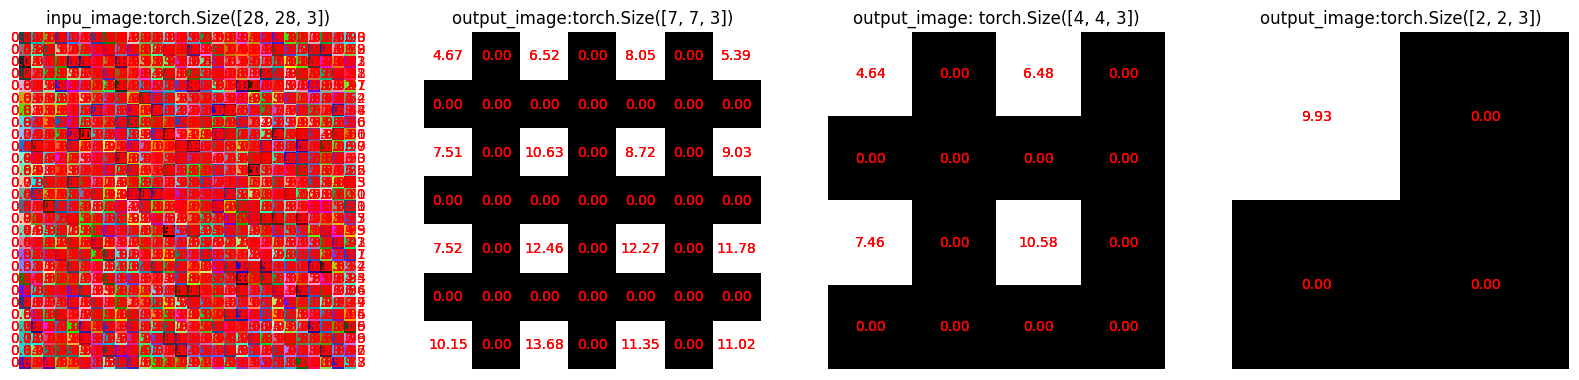

In [160]:


# output_image = convolve(output_image, kernel_size, padding, stride)
# output_image = convolve(output_image, kernel_size, padding, stride)
# output_image = convolve(output_image, kernel_size, padding, stride)

import matplotlib.pyplot as plt
import numpy as np
# Create a figure with a 3x1 grid of subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# output_image = convolve(output_image, kernel_size, padding, stride)



# Plot the sliced input image
axes[0].set_title(f'inpu_image:{input_img.shape}')
axes[0].imshow(input_img)
axes[0].axis('off')
display_values(axes[0], input_img)



output_image = convolve(output_image, kernel_size, padding, stride)

# Plot the kernel image
axes[1].set_title(f'output_image:{output_image.shape}')
axes[1].imshow(output_image)
axes[1].axis('off')
display_values(axes[1], output_image)

# Plot the convolved result
output_image = convolve(output_image, kernel_size, padding, stride)

# convolved = o[:3, :3] @ cv.kernel
axes[2].set_title(f'output_image: {output_image.shape}')
axes[2].imshow(output_image)
axes[2].axis('off')
display_values(axes[2], output_image)

# Show the plots
output_image = convolve(output_image, kernel_size, padding, stride)

axes[3].set_title(f'output_image:{output_image.shape}')
axes[3].imshow(output_image)
axes[3].axis('off')
display_values(axes[3], output_image)

# Show the plots
plt.show()

# Perform the convolution operation (assuming cv.convolve() modifies or uses the attributes appropriately)
# cv.convolve()


In [112]:
output_image[:2,:2]

tensor([[7.5349e+08, 7.5349e+08],
        [7.5349e+08, 7.5349e+08]])

torch.Size([26, 26, 3]) 26 26 3
torch.Size([28, 28, 3])


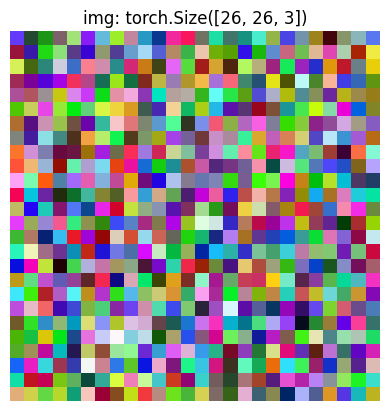

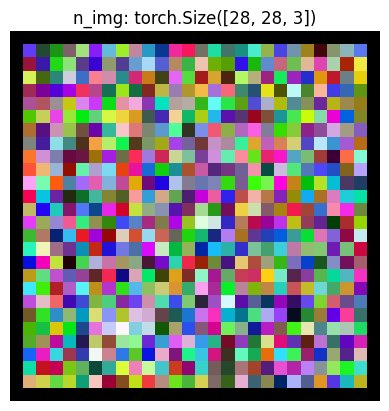

In [48]:
i = torch.rand(26,26,3)

def custom_padding(img):
    padding =1
    w,h,c = img.shape
    print(img.shape,w,h,c)

    new_img = torch.zeros((h + 2 * padding, w + 2 * padding, c))


    new_img[padding:-padding, padding:-padding] = img
    print(new_img.shape)
    plt.title(f"img: {img.shape}")
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    plt.title(f"n_img: {new_img.shape}")
    plt.imshow(new_img)
    plt.axis('off')
    plt.show()



custom_padding(i)

In [162]:
import torch





# Function to display matrix values on the subplot
def display_values(ax, matrix):
    # Check if the matrix is 3D
    if matrix.ndim == 3:
        h, w, c = matrix.shape
        # Iterate through each channel
        for k in range(c):
            for i in range(h):
                for j in range(w):
                    ax.text(j, i, f'{matrix[i, j, k]:.2f}', ha='center', va='center', color='red')
    else:
        # If the matrix is 2D, handle it directly
        for (i, j), val in np.ndenumerate(matrix):
            ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red')


            



def scalar_product(mat1, mat2):
    # output = torch.zeros((3,3))
    # # print(output.shape)
    # for row in range(len(mat1)):
    #     for col in range(len(mat1[0])):

    #         output[row, col] = mat1[row, col] * mat2[row, col]
    
    # return output.sum()

    return (mat1 * mat2).sum()

# print(convolved)
# print(cv.kernel)
# scalar_product(convolved, cv.kernel)



def convolve(input_img, kernel_size=3, padding = 0, stride=1):
    w,h,c = input_img.shape
    print(f"input_img.shape:{input_img.shape} | w:{w}, h:{h}, c:{c}")
    kernel = torch.rand(kernel_size,kernel_size, c)
    output_height = (h - kernel_size + 2 * padding) // stride + 1
    output_width = (w - kernel_size + 2 * padding) // stride + 1
    output_img = torch.zeros((output_height, output_width, c))



    # print(f"input_img:{input_img.shape}")
    print(f"output_img:{output_img.shape}")
    print(f"kernel:{kernel.shape}")

    if padding:
            
            # print(input_img.shape,w,h,c)

            new_img = torch.zeros((h + 2 * padding, w + 2 * padding, c))


            new_img[padding:-padding, padding:-padding, :] = input_img
            print(f"padding:{padding} added! {input_img.shape}-> {new_img.shape}")
            input_img = new_img

    print(f"output_img:{output_img.shape}")


    for channel in range(0, output_img.shape[2], 1): #rows

        for row in range(0, output_img.shape[0],stride): #rows

            for col in range(0,output_img.shape[1],stride): # cols
                # self.input_img
                output_img[row,col, channel] = scalar_product(input_img[row :row+3, col:col+3, channel], kernel)
                # print(col)
                
        # plt.imshow(output_img)
        # plt.axis(False)
        # plt.show()
    return output_img



kernel_size = 3
padding = 1
stride =2
input_img = torch.rand(28,28,3)
print(input_img.shape)

output_image = convolve(input_img, kernel_size, padding, stride)
output_image.shape

torch.Size([28, 28, 3])
input_img.shape:torch.Size([28, 28, 3]) | w:28, h:28, c:3
output_img:torch.Size([14, 14, 3])
kernel:torch.Size([3, 3, 3])
padding:1 added! torch.Size([28, 28, 3])-> torch.Size([30, 30, 3])
output_img:torch.Size([14, 14, 3])


torch.Size([14, 14, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..18.332031].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..22.611853].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..7.029334].


input_img.shape:torch.Size([14, 14, 3]) | w:14, h:14, c:3
output_img:torch.Size([7, 7, 3])
kernel:torch.Size([3, 3, 3])
padding:1 added! torch.Size([14, 14, 3])-> torch.Size([16, 16, 3])
output_img:torch.Size([7, 7, 3])
input_img.shape:torch.Size([7, 7, 3]) | w:7, h:7, c:3
output_img:torch.Size([4, 4, 3])
kernel:torch.Size([3, 3, 3])
padding:1 added! torch.Size([7, 7, 3])-> torch.Size([9, 9, 3])
output_img:torch.Size([4, 4, 3])
input_img.shape:torch.Size([4, 4, 3]) | w:4, h:4, c:3
output_img:torch.Size([2, 2, 3])
kernel:torch.Size([3, 3, 3])
padding:1 added! torch.Size([4, 4, 3])-> torch.Size([6, 6, 3])
output_img:torch.Size([2, 2, 3])


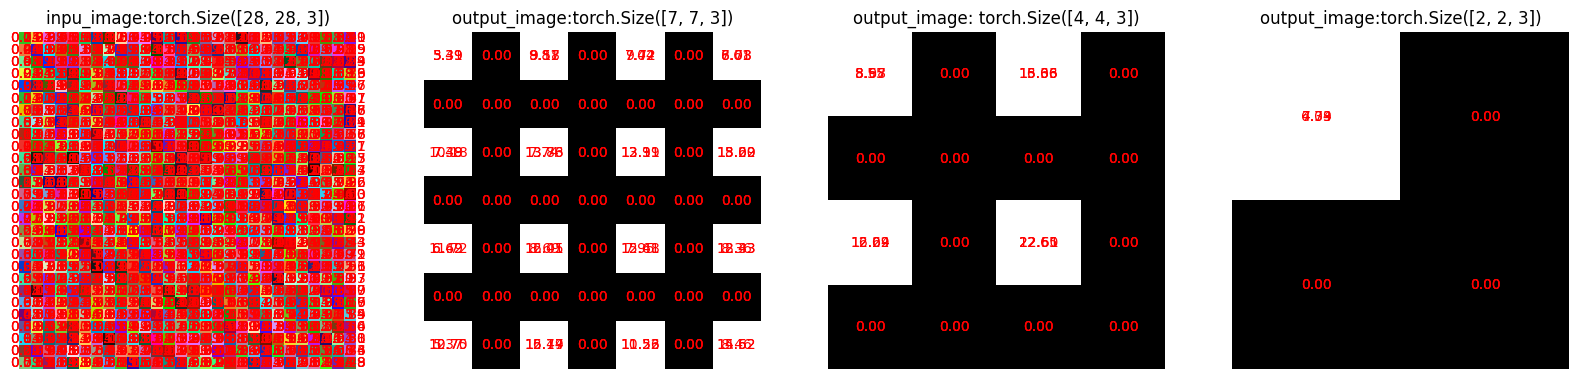

In [163]:


# output_image = convolve(output_image, kernel_size, padding, stride)
# output_image = convolve(output_image, kernel_size, padding, stride)
# output_image = convolve(output_image, kernel_size, padding, stride)

import matplotlib.pyplot as plt
import numpy as np
# Create a figure with a 3x1 grid of subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# output_image = convolve(output_image, kernel_size, padding, stride)



# Plot the sliced input image
axes[0].set_title(f'inpu_image:{input_img.shape}')
axes[0].imshow(input_img)
axes[0].axis('off')
display_values(axes[0], input_img)



output_image = convolve(output_image, kernel_size, padding, stride)

# Plot the kernel image
axes[1].set_title(f'output_image:{output_image.shape}')
axes[1].imshow(output_image)
axes[1].axis('off')
display_values(axes[1], output_image)

# Plot the convolved result
output_image = convolve(output_image, kernel_size, padding, stride)

# convolved = o[:3, :3] @ cv.kernel
axes[2].set_title(f'output_image: {output_image.shape}')
axes[2].imshow(output_image)
axes[2].axis('off')
display_values(axes[2], output_image)

# Show the plots
output_image = convolve(output_image, kernel_size, padding, stride)

axes[3].set_title(f'output_image:{output_image.shape}')
axes[3].imshow(output_image)
axes[3].axis('off')
display_values(axes[3], output_image)

# Show the plots
plt.show()

# Perform the convolution operation (assuming cv.convolve() modifies or uses the attributes appropriately)
# cv.convolve()


In [164]:
import torch
import torch.nn as nn

# Define an example RGB image with size (28, 28, 3)
input_image = torch.rand((1, 3, 28, 28))  # Batch size of 1, 3 channels (RGB), 28x28 pixels

# Define a convolutional layer with 3 input channels (RGB) and 16 output channels (feature maps)
conv_layer = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)

# Apply the convolutional layer
output_image = conv_layer(input_image)

print(f"Input shape: {input_image.shape}")  # torch.Size([1, 3, 28, 28])
print(f"Output shape: {output_image.shape}")  # torch.Size([1, 16, 28, 28])

Input shape: torch.Size([1, 3, 28, 28])
Output shape: torch.Size([1, 16, 28, 28])


# single channel

In [51]:
import torch





# Function to display matrix values on the subplot
def display_values(ax, matrix):
    # Check if the matrix is 3D
    if matrix.ndim == 3:
        h, w, c = matrix.shape
        # Iterate through each channel
        for k in range(c):
            for i in range(h):
                for j in range(w):
                    ax.text(j, i, f'{matrix[i, j, k]:.2f}', ha='center', va='center', color='red')
    else:
        # If the matrix is 2D, handle it directly
        for (i, j), val in np.ndenumerate(matrix):
            ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='red')


            



def scalar_product(mat1, mat2):
    # output = torch.zeros((3,3))
    # print("\t\t\tscalars")
    # print(f"\t\tmat1:{mat1.shape}")
    # print(f"\t\tmat2:{mat2.shape}")
    # for row in range(len(mat1)):
    #     for col in range(len(mat1[0])):

    #         output[row, col] = mat1[row, col] * mat2[row, col]
    
    # return output.sum()

    return (mat1 * mat2).sum()

# print(convolved)
# print(cv.kernel)
# scalar_product(convolved, cv.kernel)



def convolve(input_img, kernel_size=3, padding = 0, stride=1, in_channels = 3, out_channels=3):
    c, w, h = input_img.shape
    print(f"input_img.shape:{input_img.shape} | w:{w}, h:{h}, c:{c}")
    kernels = torch.rand(out_channels, in_channels, kernel_size, kernel_size)
    output_height = (h - kernel_size + 2 * padding) // stride + 1
    output_width = (w - kernel_size + 2 * padding) // stride + 1
    output_img = torch.zeros((out_channels, output_height, output_width))



    # print(f"input_img:{input_img.shape}")
    print(f"output_img: {output_img.shape}")
    print(f"kernel: {kernels.shape}")

    if padding:
            
            # print(input_img.shape,w,h,c)

            new_img = torch.zeros((in_channels, h + 2 * padding, w + 2 * padding))


            new_img[:, padding:-padding, padding:-padding] = input_img
            print(f"\tpadding:{padding} added! {input_img.shape}-> {new_img.shape}")
            input_img = new_img

    print(f"output_img:{output_img.shape}")


    for channel in range(0, output_img.shape[0]): #channel

        for row in range(0, output_img.shape[1], stride): #rows

            for col in range(0, output_img.shape[2], stride): # cols
                # Sum the convolution of each channel with the corresponding sub-kernel

                # multiply 3*3*3 kernel with sliced 3*3*3 of input_img
                




                # self.input_img
                output_img[channel, row, col] = scalar_product(input_img[:, row :row+kernel_size, col:col+kernel_size], kernels[channel] )
                # print(f"kernel{channel}:{kernels[channel].shape}")
                # print(col)
                
        # plt.imshow(output_img)
        # plt.axis(False)
        # plt.show()
    return output_img





kernel_size = 3
padding = 1
stride =1
input_img = torch.rand(3, 28, 28)
# print(input_img.shape)

in_channels = 3
out_channels= 8

output_image = convolve(input_img, kernel_size, padding, stride, in_channels, out_channels)
output_image.shape

input_img.shape:torch.Size([3, 28, 28]) | w:28, h:28, c:3
output_img: torch.Size([8, 28, 28])
kernel: torch.Size([8, 3, 3, 3])
	padding:1 added! torch.Size([3, 28, 28])-> torch.Size([3, 30, 30])
output_img:torch.Size([8, 28, 28])


torch.Size([8, 28, 28])

TypeError: Invalid shape (3, 28, 28) for image data

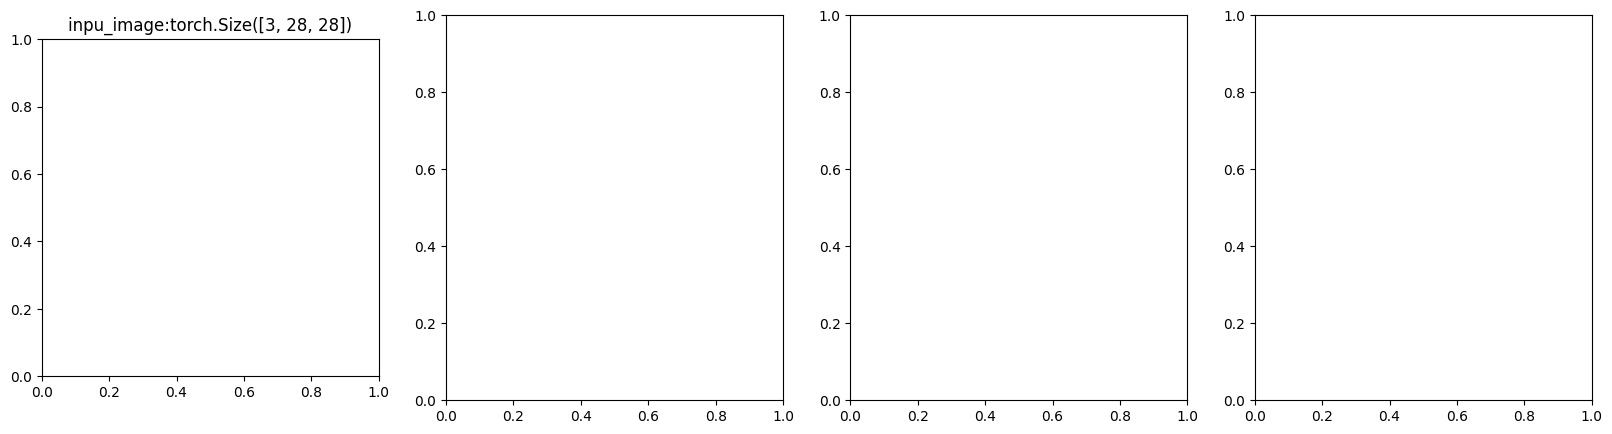

In [43]:


# output_image = convolve(output_image, kernel_size, padding, stride)
# output_image = convolve(output_image, kernel_size, padding, stride)
# output_image = convolve(output_image, kernel_size, padding, stride)

import matplotlib.pyplot as plt
import numpy as np
# Create a figure with a 3x1 grid of subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# output_image = convolve(output_image, kernel_size, padding, stride)



# Plot the sliced input image
axes[0].set_title(f'inpu_image:{input_img.shape}')
axes[0].imshow(input_img)
axes[0].axis('off')
display_values(axes[0], input_img)



output_image = convolve(output_image, kernel_size, padding, stride)

# Plot the kernel image
axes[1].set_title(f'output_image:{output_image.shape}')
axes[1].imshow(output_image)
axes[1].axis('off')
display_values(axes[1], output_image)

# Plot the convolved result
output_image = convolve(output_image, kernel_size, padding, stride)

# convolved = o[:3, :3] @ cv.kernel
axes[2].set_title(f'output_image: {output_image.shape}')
axes[2].imshow(output_image)
axes[2].axis('off')
display_values(axes[2], output_image)

# Show the plots
output_image = convolve(output_image, kernel_size, padding, stride)

axes[3].set_title(f'output_image:{output_image.shape}')
axes[3].imshow(output_image)
axes[3].axis('off')
display_values(axes[3], output_image)

# Show the plots
plt.show()

# Perform the convolution operation (assuming cv.convolve() modifies or uses the attributes appropriately)
# cv.convolve()


In [49]:
input_img.shape

torch.Size([3, 28, 28])

In [50]:
input_img.shape[0]

3

In [20]:
in_channels = 3
out_channels = 8


kernel = torch.rand(out_channels, in_channels, kernel_size,kernel_size)  # 5 kernels , input channels, size, size
kernel.shape

torch.Size([8, 3, 3, 3])

In [23]:
for i in kernel:
    print(kernel.shape)

torch.Size([8, 3, 3, 3])
torch.Size([8, 3, 3, 3])
torch.Size([8, 3, 3, 3])
torch.Size([8, 3, 3, 3])
torch.Size([8, 3, 3, 3])
torch.Size([8, 3, 3, 3])
torch.Size([8, 3, 3, 3])
torch.Size([8, 3, 3, 3])


In [29]:
for i in range(len(kernel)):
    print(kernel[i, :,:,:].shape)

torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])


In [30]:
for i in kernel:
    print(i.shape)

torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
torch.Size([3, 3, 3])
